# **Machine Learning in Bioinformatics**

**Homework 3:**<br/>
!!! If you don't fill these fields, your homework does not count !!!<br/>
first name and last name :amirreza kazemi<br/>
student number :95105827

You can run cells by hitting `Shift` + `Enter` or `ctrl` + `Enter`.<br/>
We highly recommend you to read each line of code carefully and try to 
understand what it exactly does.<br/>
Just alter the parts that is between green comments and specified for you. <br/>
Please do not change other parts.

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_breast_cancer 


### about the Data:<br/>
The purpose of this project is to classify tumors into malignant or benign. The following dataset is constructed based on images of tumors. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
For more details about the features of this dataset you can visit this link:
https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset<br/>
This dataset contains 30 features and 1 label called target.
The original dataset labels are 0 and 1 and in the following code boxes we change it to -1 and 1.

In [2]:
cancer = load_breast_cancer()  ## change if the data set changed
df = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
from sklearn import preprocessing
cancer.target = np.where(cancer.target==0, -1, cancer.target)
X_train ,X_test ,X_val ,y_train ,y_test ,y_val = None ,None ,None ,None ,None ,None
################################################################################
# TODO:                                                                        #
# 1- Normalize tha data.                                                       #
# 2- using train_test_split package, split your data into 3 numpy array        #
# called X_train, X_test, and X_val and also split the corresponding labels as #
# y_train, y_test, and y_val. After spliting, the ratio of your data should be # 
# approximately like this:                                                     #
#  Train : 70%     test : 20%       validation : 10%                           #
################################################################################
#X_scaled = (cancer.data - np.mean(cancer.data, axis = 0) ) / np.sqrt(np.var(cancer.data, axis = 0))
normalizer = preprocessing.MinMaxScaler()
X_scaled = normalizer.fit_transform(cancer.data)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, cancer.target, test_size = 0.2, random_state = 1)
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.125, random_state = 1)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################
print((X_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_train.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_test.shape[0]/cancer.data.shape[0]) * 100, "%")
print((X_val.shape[0]/cancer.data.shape[0]) * 100, "%")
print((y_val.shape[0]/cancer.data.shape[0]) * 100, "%")

69.94727592267135 %
69.94727592267135 %
20.035149384885763 %
20.035149384885763 %
10.017574692442881 %
10.017574692442881 %


# Ensemble Methods

## Problem 1. Bagging (15 points)


1 0.9473684210526316
3 0.9578947368421054
4 0.9614035087719298
53 0.9614035087719298
61 0.9614035087719298
63 0.9614035087719298
69 0.9614035087719298


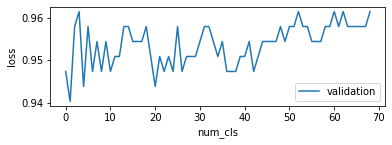

0.956140350877193

In [4]:
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
import sklearn


################################################################################
# TODO : initialize the base classifier. You can choose one of the classifiers #
# you have learned in this course.(SVM/Decision tree)                          #
# IMPORTANT: if you are using SVM as base classifier don't forget to add column#
# of '1' s for bias and be careful to use the right datset in next parts.      #
################################################################################
base_cls = tree.DecisionTreeClassifier()
  
##################################################################################
# TODO: Number of classifiers is a hyperparameter. Choose it by using validation #
# data to have the best accuracy                                                 #
# For different number of classifiers, train the model with training data and    #
# compute accuracy for validation data. Plot accuracy-number of classifiers plot.#
##################################################################################
num_cls = None
seed = None
best_val_acc = 0
best_model = None
acc_val_history = list()
for num_cls in range(1, 70):
    val_acc = 0
    for seed in range(0, 5):
        model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_cls, 
                          random_state = seed)
        model.fit(X_train,y_train)
        y_val_pred = model.predict(X_val)
        val_acc += accuracy_score(y_val, y_val_pred)
    acc_val_history.append(val_acc / 5)
    if val_acc >= best_val_acc:
        best_val_acc = val_acc
        best_model = model
        print(num_cls, val_acc/5)
            
plt.subplot(2, 1, 2)
plt.plot(acc_val_history, label='validation')
plt.ylabel("loss")
plt.xlabel("num_cls")
plt.legend()
plt.show()
################################################################################
# compute and report the accuracy for test data.                               #
################################################################################
y_test_pred = best_model.predict(X_test)
accuracy_score(y_test, y_test_pred)


## Problem 2. Random Forest(25 points)</br>
In this part, you should write your own code to classify the data, using random forest from sklearn package in python.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#################################################################################
# TODO:use the validation data to determine hyperparameters(number and depth of #
# trees) for the best accuracy                                                  # 
#################################################################################
n_estimators , max_depth, random_state = None, None, None
best_val_acc , best_model = 0, None
for max_depth in range(1, 15):
    for n_estimators in range(1 , 35):
        for k in range(0,10, 3):
            classifier = RandomForestClassifier(max_depth=max_depth, random_state=k, n_estimators =n_estimators)
            classifier.fit(X_train, y_train)
            y_val_predict = classifier.predict(X_val)
            y_val_acc = accuracy_score(y_val, y_val_predict)
            if y_val_acc > best_val_acc :
                best_val_acc = y_val_acc
                best_model = model
                print(" num of trees ", "max_depth ", "random_state bootstrapping ",n_estimators, max_depth, k)
                print(accuracy_score(y_val, y_val_predict))
            #if y_val_acc == best_val_acc :
            #    best_val_acc = y_val_acc
            #    best_model = model


#######################################################################################
#TODO:report accuracy, presition,recall and confusion matrix for train and test data  #
#######################################################################################
print("accuracy, precision,recall and confusion matrix for train data:\n")
y_pred_train = best_model.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


print("accuracy, precision,recall and confusion matrix for train data:\n")
y_pred_test = best_model.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


 num of trees  max_depth  random_state bootstrapping  1 1 0
0.8771929824561403
 num of trees  max_depth  random_state bootstrapping  1 1 3
0.9473684210526315
 num of trees  max_depth  random_state bootstrapping  3 1 3
0.9649122807017544
 num of trees  max_depth  random_state bootstrapping  3 3 6
1.0
accuracy, precision,recall and confusion matrix for train data:

1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       247

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

[[151   0]
 [  0 247]]
accuracy, precision,recall and confusion matrix for train data:

0.956140350877193
              precision    recall  f1-score   support

          -1       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                     

Question:
Explain how you did choose the hyperparameters.</br>

there are 3 paramaters that should be tune. depth of tree, number of trees and random seed in RandomForest Class . the last hyper parameter used in bootstrpping process . forech one I set an interval and the best combination picked and also the quality of different models measured by their accuracy on validation data. 


## Problem 3. Boosting : AdaBoost (35 points)

In this part you should implement adaptive boosting algorithm. </br>
<picture>
  <img src="http://uupload.ir/files/b919_adaboost.png" alt="Adaboost" width="600" height="300">
</picture>



In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import math
X_train ,X_test ,y_train ,y_test = None ,None ,None ,None
###################################################################
# TODO: use 80% of normalized data as train and 20% as test data. #
###################################################################
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size = 0.2, random_state=1)


######################################################################
#TODO : define a weak decision tree.                                 #
# initialize these parameters: criterion="entropy" and max_depth = 1 #
######################################################################
Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
#############################################################################################
#TODO : report accuracy of your weak model on train and test data by using cross validation #
#############################################################################################
train_accuracy = np.mean(cross_validate(Tree_model, X_train, y_train)['test_score']) 
print('The training data accuracy is:' ,train_accuracy * 100 , '%')

test_accuracy = np.mean(cross_validate(Tree_model, X_test, y_test)['test_score']) 
print('The test data accuracy is:' ,test_accuracy * 100 , '%')


The training data accuracy is: 89.8901098901099 %
The test data accuracy is: 85.9288537549407 %


In [0]:
class AdaBoost:
    
    def __init__(self,train_data_X,train_data_y,tree_num,test_data_X,test_data_y):
        self.train_data_X = train_data_X
        self.train_data_y = train_data_y
        self.tree_num = tree_num
        self.test_data_X = test_data_X
        self.test_data_y = test_data_y
        self.alphas = None
        self.models = None
        self.accuracy = []
        self.predictions = None
        
    def fit(self):
        Evaluation = pd.DataFrame(self.train_data_y.copy())
        Evaluation.columns = ['target']
        ## TODO:Set the initial weights w = 1/N
        Evaluation['weights'] = [1/np.size(self.train_data_X[:, 0])] * np.size(self.train_data_X[:, 0])
        alphas = [] #list of alphas 
        models = [] # list of trained models
        for t in range(self.tree_num):

            ## TODO: create a weak decisiontree classifier
            Tree_model =  DecisionTreeClassifier(criterion="entropy", max_depth = 1)
            ## TODO: fit the model with train data. set the sample_weight parameter to the 'weights' columns in Evaluation dataframe
            model = Tree_model.fit(self.train_data_X, self.train_data_y, sample_weight = np.array(Evaluation['weights']))
            
            models.append(model)
            predictions = model.predict(self.train_data_X)
            score = model.score(self.train_data_X,self.train_data_y)

            ## Add this columns to the Evaluation DataFrame
            Evaluation['predictions'] = predictions
            ## TODO: In each row if the prediction and the target are equal,this column must be '1' and '0' O.W. 
            Evaluation['evaluation'] = np.array(Evaluation['predictions']) * np.array(Evaluation['target'])
            Evaluation['evaluation'] = np.where(np.array(Evaluation['evaluation'])< 0, 0, 1)
            ## TODO: In each row if the tha data is missclassified, this column must be 1.
            Evaluation['misclassified'] = np.logical_xor(np.array(Evaluation['evaluation']), 1)
            Evaluation['misclassified'] = np.where(np.array(Evaluation['misclassified']) == False, 0, 1)
            ## TODO: Calculate the misclassification rate and accuracy and then use them to calculate error
            accuracy = np.count_nonzero(np.array(Evaluation['evaluation']) == 1) / np.size(self.train_data_X[:, 0])
            misclassification = np.count_nonzero(np.array(Evaluation['misclassified']) == 1) / np.size(self.train_data_X[:, 0])
            err = np.sum(np.array(Evaluation['misclassified']) *  np.array(Evaluation['weights']))
            ## TODO: Calculate the alpha values from the adaboost algorithm
            alpha = 1/2 * math.log((1- err)/err)
            alphas.append(alpha)
            ## TODO: update the weights
            Evaluation['weights'] = np.array(Evaluation['weights']) * np.exp(-1 * np.array(Evaluation['predictions']) * np.array(Evaluation['target']) * alpha)
            Evaluation['weights'] /= np.sum(np.array(Evaluation['weights']))

        self.alphas = alphas
        self.models = models
        
        
    def predict(self):
        
        accuracy = []
        predictions = []
        #####################################################################################
        #TODO:                                                                              #
        # 1- predict target for test data and append each prediction to the predictions list#
        # 2- Create a list of accuracies which can be used to plot the accuracy against the #
        # number of base learners used for the model                                        #
        #####################################################################################
        prediction = 0
        for alpha,model in zip(self.alphas,self.models):
            prediction += alpha * model.predict(self.test_data_X)
            predictions.append(prediction)
            self.accuracy.append(accuracy_score(self.test_data_y, np.sign(prediction)))

            
        self.predictions = np.sign(np.sum(np.array(predictions),axis=0))


With a number of  100 base models we receive an accuracy of  100.0 %


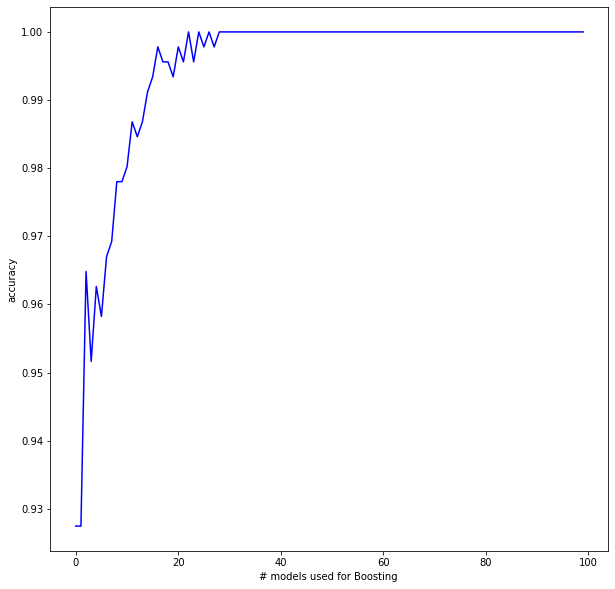

In [8]:
# Accuracy - number of base learners plot for training data

number_of_base_learners = 100

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)


#for i in range(number_of_base_learners):
model = AdaBoost(X_train,y_train,number_of_base_learners,X_train,y_train)
model.fit()
model.predict()

ax0.plot(range(len(model.accuracy)),model.accuracy,'-b')
ax0.set_xlabel('# models used for Boosting ')
ax0.set_ylabel('accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',model.accuracy[-1]*100,'%')    
                 
plt.show()   
#################################################################### 
# TODO: Plot Accuracy - number of base learners plot for test data #
####################################################################  

# Feature Selction </br>

## problem4. Filtering : correlation coefficient (25 points)


In [9]:
################################################################################# 
# TODO:                                                                         #
# use 80% of normalized data as train and 20% as test data.(just use the data   # 
# from last part)                                                               #
# 1- compute the correlation coefficient between each feature and target.       #
# 2- Report the features that their correlation is more than 0.5                #
# 3- compute the correlation between the features you reported in 2nd           #
# section and report features that their correlation with other features        #
# is less than 0.5                                                              #
# 4- use perceptron from sklearn package to classify the data. Report accurracy #
# for test data and sort the features based on their weights in perceptron.     #
# IMPORTANT: Don't forget to add 1s to the end of feature vectors to be         #
# multiplied by bias term of weight in perceptron.                              #
# 5- compare the features you reported in section 2 and 3 with the features     #
# that have the most weights in perceptron and write your analysis below        #
# 6 - Classify data with perceptron and use only the features you repoted in    # 
# section 2 and report accuracy for test data.                                  #
# 7 - Do the same with section 3 and compare accuracies.                        #
#################################################################################
from scipy.stats import pearsonr
from sklearn.linear_model import Perceptron
X_train, X_test, y_train, y_test = train_test_split(X_scaled, cancer.target, test_size = 0.2, random_state=1)
num_features = np.size(X_train[0, :])
best_features = list()
for i in range(num_features):
    corr, _ = pearsonr(X_train[:, i], y_train)
    if abs(corr) > 0.5:
        best_features.append(i)
print("section2 features:", best_features)
correlated_features = [0] * len(best_features)
for i in range(len(best_features)):
    for j in range(len(best_features)):
        if i is not j :
            corr, _ = pearsonr(X_train[:, i], X_train[:, j])
            if abs(corr) < 0.5:
                correlated_features[i] += 1
correlated_features = np.array(correlated_features)
sort = np.argsort(correlated_features)
best_features1 = [best_features[sort[-3]], best_features[sort[-2]], best_features[sort[-1]]]
print("setion3 features:", best_features1)

clf = Perceptron()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
weights = np.array([ abs(x) for x in clf.coef_])
features = np.argsort(weights[0])
print("most weighted features:", np.flip(features, axis = 0))

print("Perceptron accuracy with all features", accuracy_score(y_test, y_pred))

clf1 = Perceptron()
clf1 = clf1.fit(X_train[:, best_features], y_train)
y_pred1 = clf1.predict(X_test[:, best_features])
print("Perceptron accracy with section2 features", accuracy_score(y_test, y_pred1))


clf2 = Perceptron()
clf2 = clf2.fit(X_train[:, best_features1], y_train)
y_pred2 = clf2.predict(X_test[:, best_features1])
print("Perceptron accracy with section3 features", accuracy_score(y_test, y_pred2))

section2 features: [0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 22, 23, 25, 26, 27]
setion3 features: [2, 23, 27]
most weighted features: [ 7 21 20  6 23 10 22 27 24  9 28 12 26 13  1 15 14 19  3 11 29  5  8 16
 25  2 17 18  0  4]
Perceptron accuracy with all features 0.9649122807017544
Perceptron accracy with section2 features 0.8859649122807017
Perceptron accracy with section3 features 0.9035087719298246


explanation of part 5 and 6:

همان طور که در خروجی های گزارش شده در بالا مشاهده میشود ویژگی هایی که در بخش 2 انتخاب شدند 15 تا هستند که 9 تای آنها در میان 15 تا ویژگی هستند که در الگوریتم پرسپترون بیشترین وزن را دارند . هم چنین ویژگی های گزارش شده در بخش سوم 3 عدد هستند که دو تا از این 3 ویژگی در میان 4 تا پر وزنترین ویژگی ها هستند . علاوه بر این دقتی که بر روی داده تست با استفاده از ویژگی های بخش 2 و 3 بدست آورده ایم دقت مناسبی بوده و نزدیک حالتی است که از همه فیچر ها استفاده کردیم . از آن جا که میدانیم ارتباطی میان وزن ویژگی ها در دسته بند خطی و اهمیت ویژگی وجود دارد (این مساله نیز به راحتی قابل بررسی است زیرا هرچه وزن یک ویژگی بیشتر باشد مقدار آن ویژگی تاثیر بیشتری در دسته بندی میگذارد ) اینکه دقت ما بر روی داده تست نزدیک به حالت کلی  است و اینکه فیچر های استخراج شده تقریبا همان ویژگی های با وزن زیاد هستند نشان میدهد فرایند انتخاب ویژگی را به درستی انجام داده ایم .  

Question: Is it important to extract features before classifying using methods like decision tree and SVM? why? 

استخراج ویژگی ها هم به جهت کاهش احتمال اورفیت برروی داده و هم به جهت کاهش بار سنگین محاسبات تکنیک بسیار مناسبی است . به عنوان مثال مدل هایی مانند درخت تصمیم ممکن است بر روی داده ترین اورفیت داشته باشند بنابراین لازم است تا با استخراج ویژگی ها یا به عبارتی کوچک کردن فضای فرضیه پیچیدگی مدل را کاهش دهیم . چنین مفهومی برای ماشین بردار پشتیبان نیز قابل بررسی است زیرا استخراج فیچر به معنای صفر کردن برخی مولفه های بردار وزن است در نتیجه پیچیدگی مدل کاهش و اورفیت کاهش میابد . در نتیجه اگر قبل از فرایند اموزش ویزگی ها را استخراج کنیم میتوانیم مدلی با سربار محسبات کمتر و پیچیدگی کمتر اموزش دهیم 

## problem 5. mRMR (10 bonus points) </br>
In this part you should write your own code and classify the data using mRMR method.You can use "pymrmr" package for this part.

In [34]:
import pymrmr

data = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer["feature_names"],["target"]))
data.insert(loc=0, column='t', value=cancer["target"])
data = data.drop(data.columns[[31]], axis=1)
pymrmr.mRMR(data, 'MIQ', 10)


['worst area',
 'radius error',
 'worst compactness',
 'worst radius',
 'perimeter error',
 'mean radius',
 'worst perimeter',
 'area error',
 'mean perimeter',
 'mean area']

     |████████████████████████████████| 71kB 2.4MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.8-cp36-cp36m-linux_x86_64.whl size=256761 sha256=35e8482943f0872dc90e70706b414be02e534b17ff54ea5231cb35b2e9387692
  Stored in directory: /root/.cache/pip/wheels/5b/ce/3a/bc9b80047f68973d909a35bb8e3062b7c7377510607ec35998
Successfully built pymrmr
